<a href="https://colab.research.google.com/github/srikarthadaka/data_science/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# uploaded = files.upload()
data = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/data_science/main/Mobile%20Price%20Prediction.csv")
data.sample(7)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
10,289,2438,16,162.0,5.3,277,8,1.500,32.000,4.000,13.0,8.0,4000,7.7
90,237,1646,141,404.0,8.0,160,4,1.200,8.000,1.000,5.0,5.0,4500,9.0
113,64,754,308,77.9,2.4,167,0,0.000,0.004,0.004,0.0,0.0,850,12.4
55,575,1777,45,174.0,5.5,178,4,1.300,4.000,0.512,5.0,0.0,2250,9.2
142,1161,2508,1530,152.0,5.2,424,4,2.500,16.000,3.000,20.7,2.2,3100,7.3
33,1020,2654,30,151.0,5.7,386,8,1.550,32.000,2.000,16.0,5.0,3050,5.9
148,851,3055,2106,158.0,5.5,401,4,1.875,64.000,6.000,16.0,8.0,3000,7.4


In [3]:
data.shape

(161, 14)

In [4]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['product_id', 'price', 'sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'rearcam', 'front_cam',
       'battery', 'thickness'],
      dtype='object')


In [5]:
data.rename(columns = {'resoloution':'resolution', 'cpu core':'cpu_core', 'cpu freq':'cpu_freq',
                        'internal mem':'internal_mem', 'rearcam':'rear_cam'}, inplace = True)
print(data.columns)

Index(['product_id', 'price', 'sale', 'weight', 'resolution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'rear_cam', 'front_cam',
       'battery', 'thickness'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    161 non-null    int64  
 1   price         161 non-null    int64  
 2   sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resolution    161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  rear_cam      161 non-null    float64
 11  front_cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [7]:
data[data.columns[:]].corr()['price'][:].sort_values()

thickness      -0.716773
weight          0.144555
product_id      0.165136
sale            0.273263
resolution      0.404010
battery         0.559946
front_cam       0.675286
cpu_core        0.686811
cpu_freq        0.727383
rear_cam        0.739538
internal_mem    0.776738
ppi             0.817614
ram             0.896915
price           1.000000
Name: price, dtype: float64

In [8]:
summaries = pd.DataFrame(columns=["column","type","nan_count","unique_count"])


for i,feature in enumerate(data.columns):

    summaries.loc[i,"column"] = feature
    summaries.loc[i, "type"] = data[feature].dtypes 
    summaries.loc[i, "nan_count"] = data[feature].isnull().sum()
    summaries.loc[i, "unique_count"] = len(data[feature].unique())
    summaries.loc[i, "unique_percentage"] = len(data[feature].unique())/data.shape[0]
summaries 

,column,type,nan_count,unique_count,unique_percentage
0,product_id,int64,0,83,0.515528
1,price,int64,0,81,0.503106
2,sale,int64,0,125,0.776398
3,weight,float64,0,62,0.385093
4,resolution,float64,0,24,0.149068
5,ppi,int64,0,45,0.279503
6,cpu_core,int64,0,6,0.037267
7,cpu_freq,float64,0,28,0.173913
8,internal_mem,float64,0,10,0.062112
9,ram,float64,0,12,0.074534


In [9]:
data['product_id'].value_counts()

66      2
1062    2
832     2
133     2
827     2
       ..
203     1
10      1
622     1
40      1
856     1
Name: product_id, Length: 83, dtype: int64

In [10]:
(data[(data['product_id'] == 1062)])

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
93,1062,1810,164,393.0,8.0,189,4,1.2,16.0,1.5,3.15,1.2,4450,9.7
95,1062,1810,166,393.0,8.0,189,4,1.2,16.0,1.5,3.15,1.2,4450,9.7


In [11]:
data[data.duplicated()]

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness


In [12]:
# plt.figure(figsize=(20,10))
# sns.heatmap(data.corr(),cmap='rocket',annot=True);

data.corr().style.background_gradient(cmap='coolwarm')

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resolution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu_freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal_mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


In [13]:
# We are dropping the product_id as it is doesnot contribute much to the price

data_1=data.drop(['product_id'], axis=1)
#data_1 = del data['product_id]
data_1.shape

(161, 13)

In [14]:
data[data.columns[:]].corr()['sale'][:].sort_values()

thickness      -0.047991
weight          0.016114
resolution      0.017154
cpu_core        0.069517
cpu_freq        0.099133
battery         0.120338
product_id      0.218548
ppi             0.235896
price           0.273263
rear_cam        0.292164
ram             0.373127
front_cam       0.437233
internal_mem    0.489308
sale            1.000000
Name: sale, dtype: float64

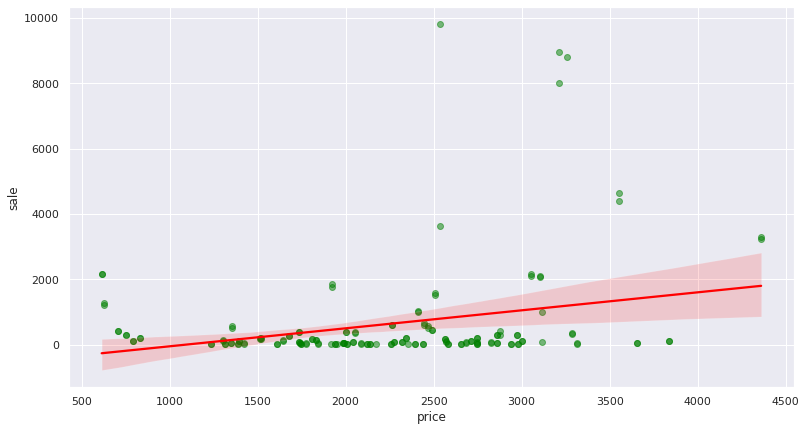

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x='price', y="sale", data=data, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})

plt.show()

In [16]:
data['price'].corr(data['sale'])

0.2732625202250552

In [17]:
data_2 = data.drop(['product_id','sale'], axis=1)
data_2.shape

(161, 12)

In [18]:
data_2[data_2.duplicated()].value_counts().sort_values()

price  weight  resolution  ppi  cpu_core  cpu_freq  internal_mem  ram    rear_cam  front_cam  battery  thickness
614    69.8    1.40        129  0         0.000     0.0           0.004  0.0       0.0        800      14.1         1
791    66.0    1.50        121  1         0.208     0.0           0.004  0.0       0.0        800      13.2         1
833    78.4    2.40        166  0         0.000     0.0           0.008  0.0       0.0        1100     12.9         1
1238   134.1   4.00        233  2         1.200     8.0           1.000  2.0       0.0        1560     11.7         1
1302   127.9   4.00        235  2         1.200     8.0           1.000  2.0       0.0        1500     10.6         1
                                                                                                                   ..
3658   168.0   5.15        428  8         2.450     64.0          6.000  12.0      8.0        3350     7.5          1
3837   167.8   5.43        541  4         1.875     128.0    

In [19]:
#(data[(data['price'] == 614)])

In [20]:
# removed duplicated rows
data_22 = data_2.drop_duplicates()
data_22.shape

(83, 12)

In [21]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=data_1)

In [22]:
data_2.corr().style.background_gradient(cmap='coolwarm')

,price,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
price,1.000000,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
weight,0.144555,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resolution,0.404010,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_core,0.686811,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu_freq,0.727383,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal_mem,0.776738,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
rear_cam,0.739538,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998
front_cam,0.675286,-0.005971,0.202720,0.491371,0.586698,0.358319,0.555733,0.647470,0.596374,1.000000,0.295283,-0.493542


In [23]:
data_22.corr().style.background_gradient(cmap='coolwarm')

,price,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
price,1.000000,0.143802,0.403869,0.814855,0.688402,0.729808,0.778957,0.896040,0.740738,0.674465,0.558053,-0.709908
weight,0.143802,1.000000,0.888941,-0.051286,0.211839,0.223620,0.101414,0.150707,-0.033213,-0.010656,0.834147,-0.173160
resolution,0.403869,0.888941,1.000000,0.182181,0.469469,0.505220,0.204430,0.327706,0.248331,0.198772,0.842404,-0.526905
ppi,0.814855,-0.051286,0.182181,1.000000,0.491996,0.710511,0.617544,0.749947,0.769729,0.485831,0.305185,-0.485723
cpu_core,0.688402,0.211839,0.469469,0.491996,1.000000,0.492859,0.282455,0.490418,0.613207,0.590707,0.456587,-0.691833
cpu_freq,0.729808,0.223620,0.505220,0.710511,0.492859,1.000000,0.449005,0.636068,0.624636,0.366072,0.474244,-0.605878
internal_mem,0.778957,0.101414,0.204430,0.617544,0.282455,0.449005,1.000000,0.874567,0.455353,0.558115,0.462741,-0.361006
ram,0.896040,0.150707,0.327706,0.749947,0.490418,0.636068,0.874567,1.000000,0.647039,0.643981,0.542012,-0.511953
rear_cam,0.740738,-0.033213,0.248331,0.769729,0.613207,0.624636,0.455353,0.647039,1.000000,0.603622,0.283145,-0.550933
front_cam,0.674465,-0.010656,0.198772,0.485831,0.590707,0.366072,0.558115,0.643981,0.603622,1.000000,0.285624,-0.489182


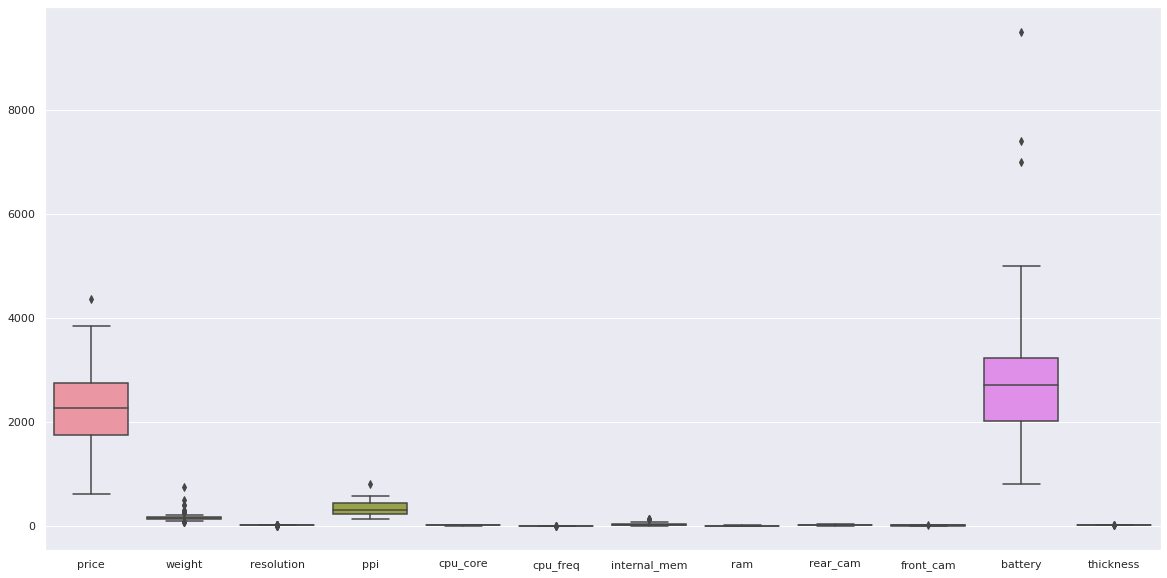

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_22)

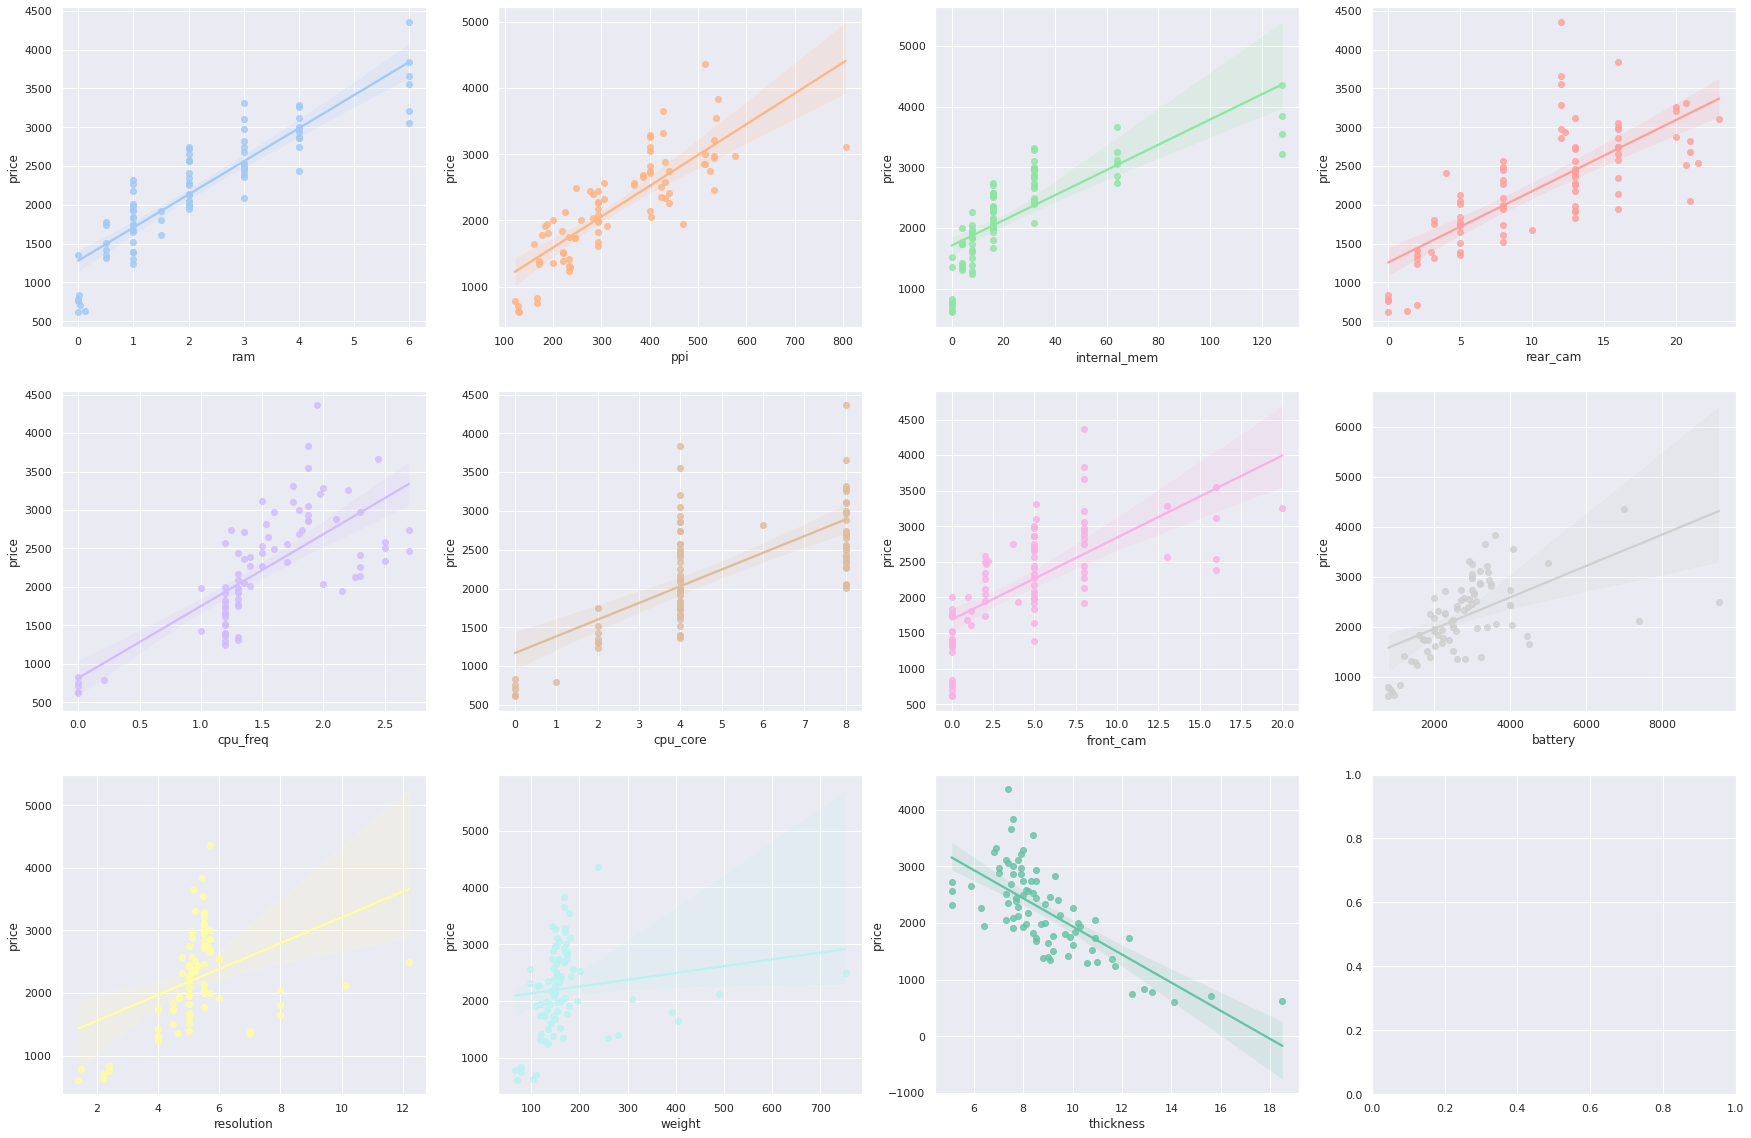

In [25]:
fig, axes = plt.subplots(3,4,figsize=(30,20))
axe = axes.flatten()

color_palette = sns.color_palette("pastel") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

target_correlation = data_22.corr().price.sort_values(ascending=False).index.tolist()[1:]

for i,feature in enumerate(target_correlation):
    sns.regplot(data=data_22, x=feature, y="price", color=color_palette[i], ax=axe[i])
plt.show()

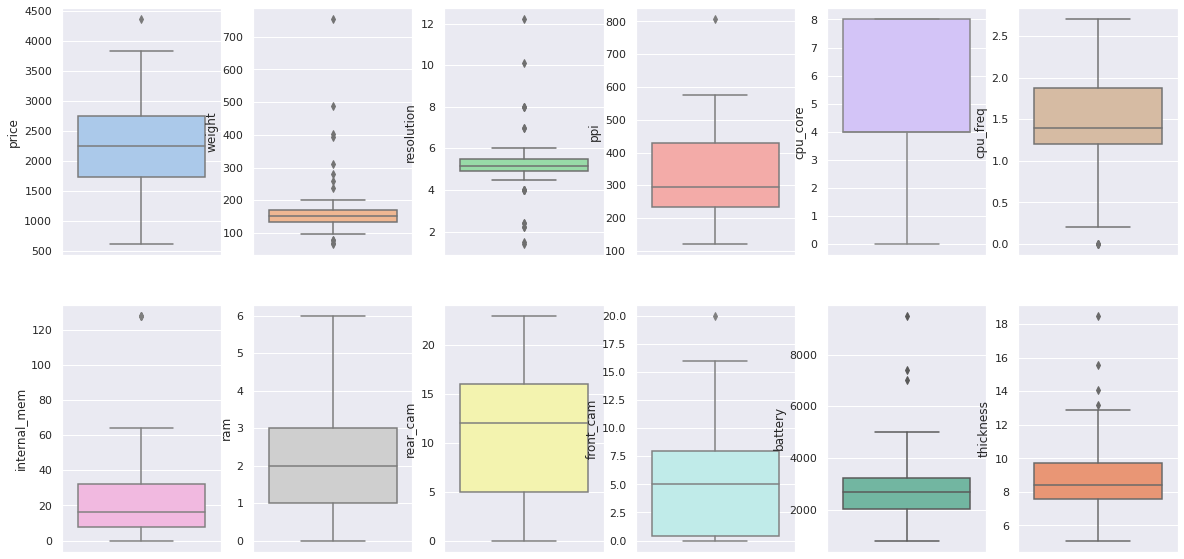

In [26]:
color_palette = sns.color_palette("pastel") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

fig, axes = plt.subplots(2, 6,figsize=(20,10))
axe = axes.flatten()

for i,feature in enumerate(data_22.columns):
    sns.boxplot(data=data_22, y=feature, ax=axe[i], color=color_palette[i])    
plt.show()

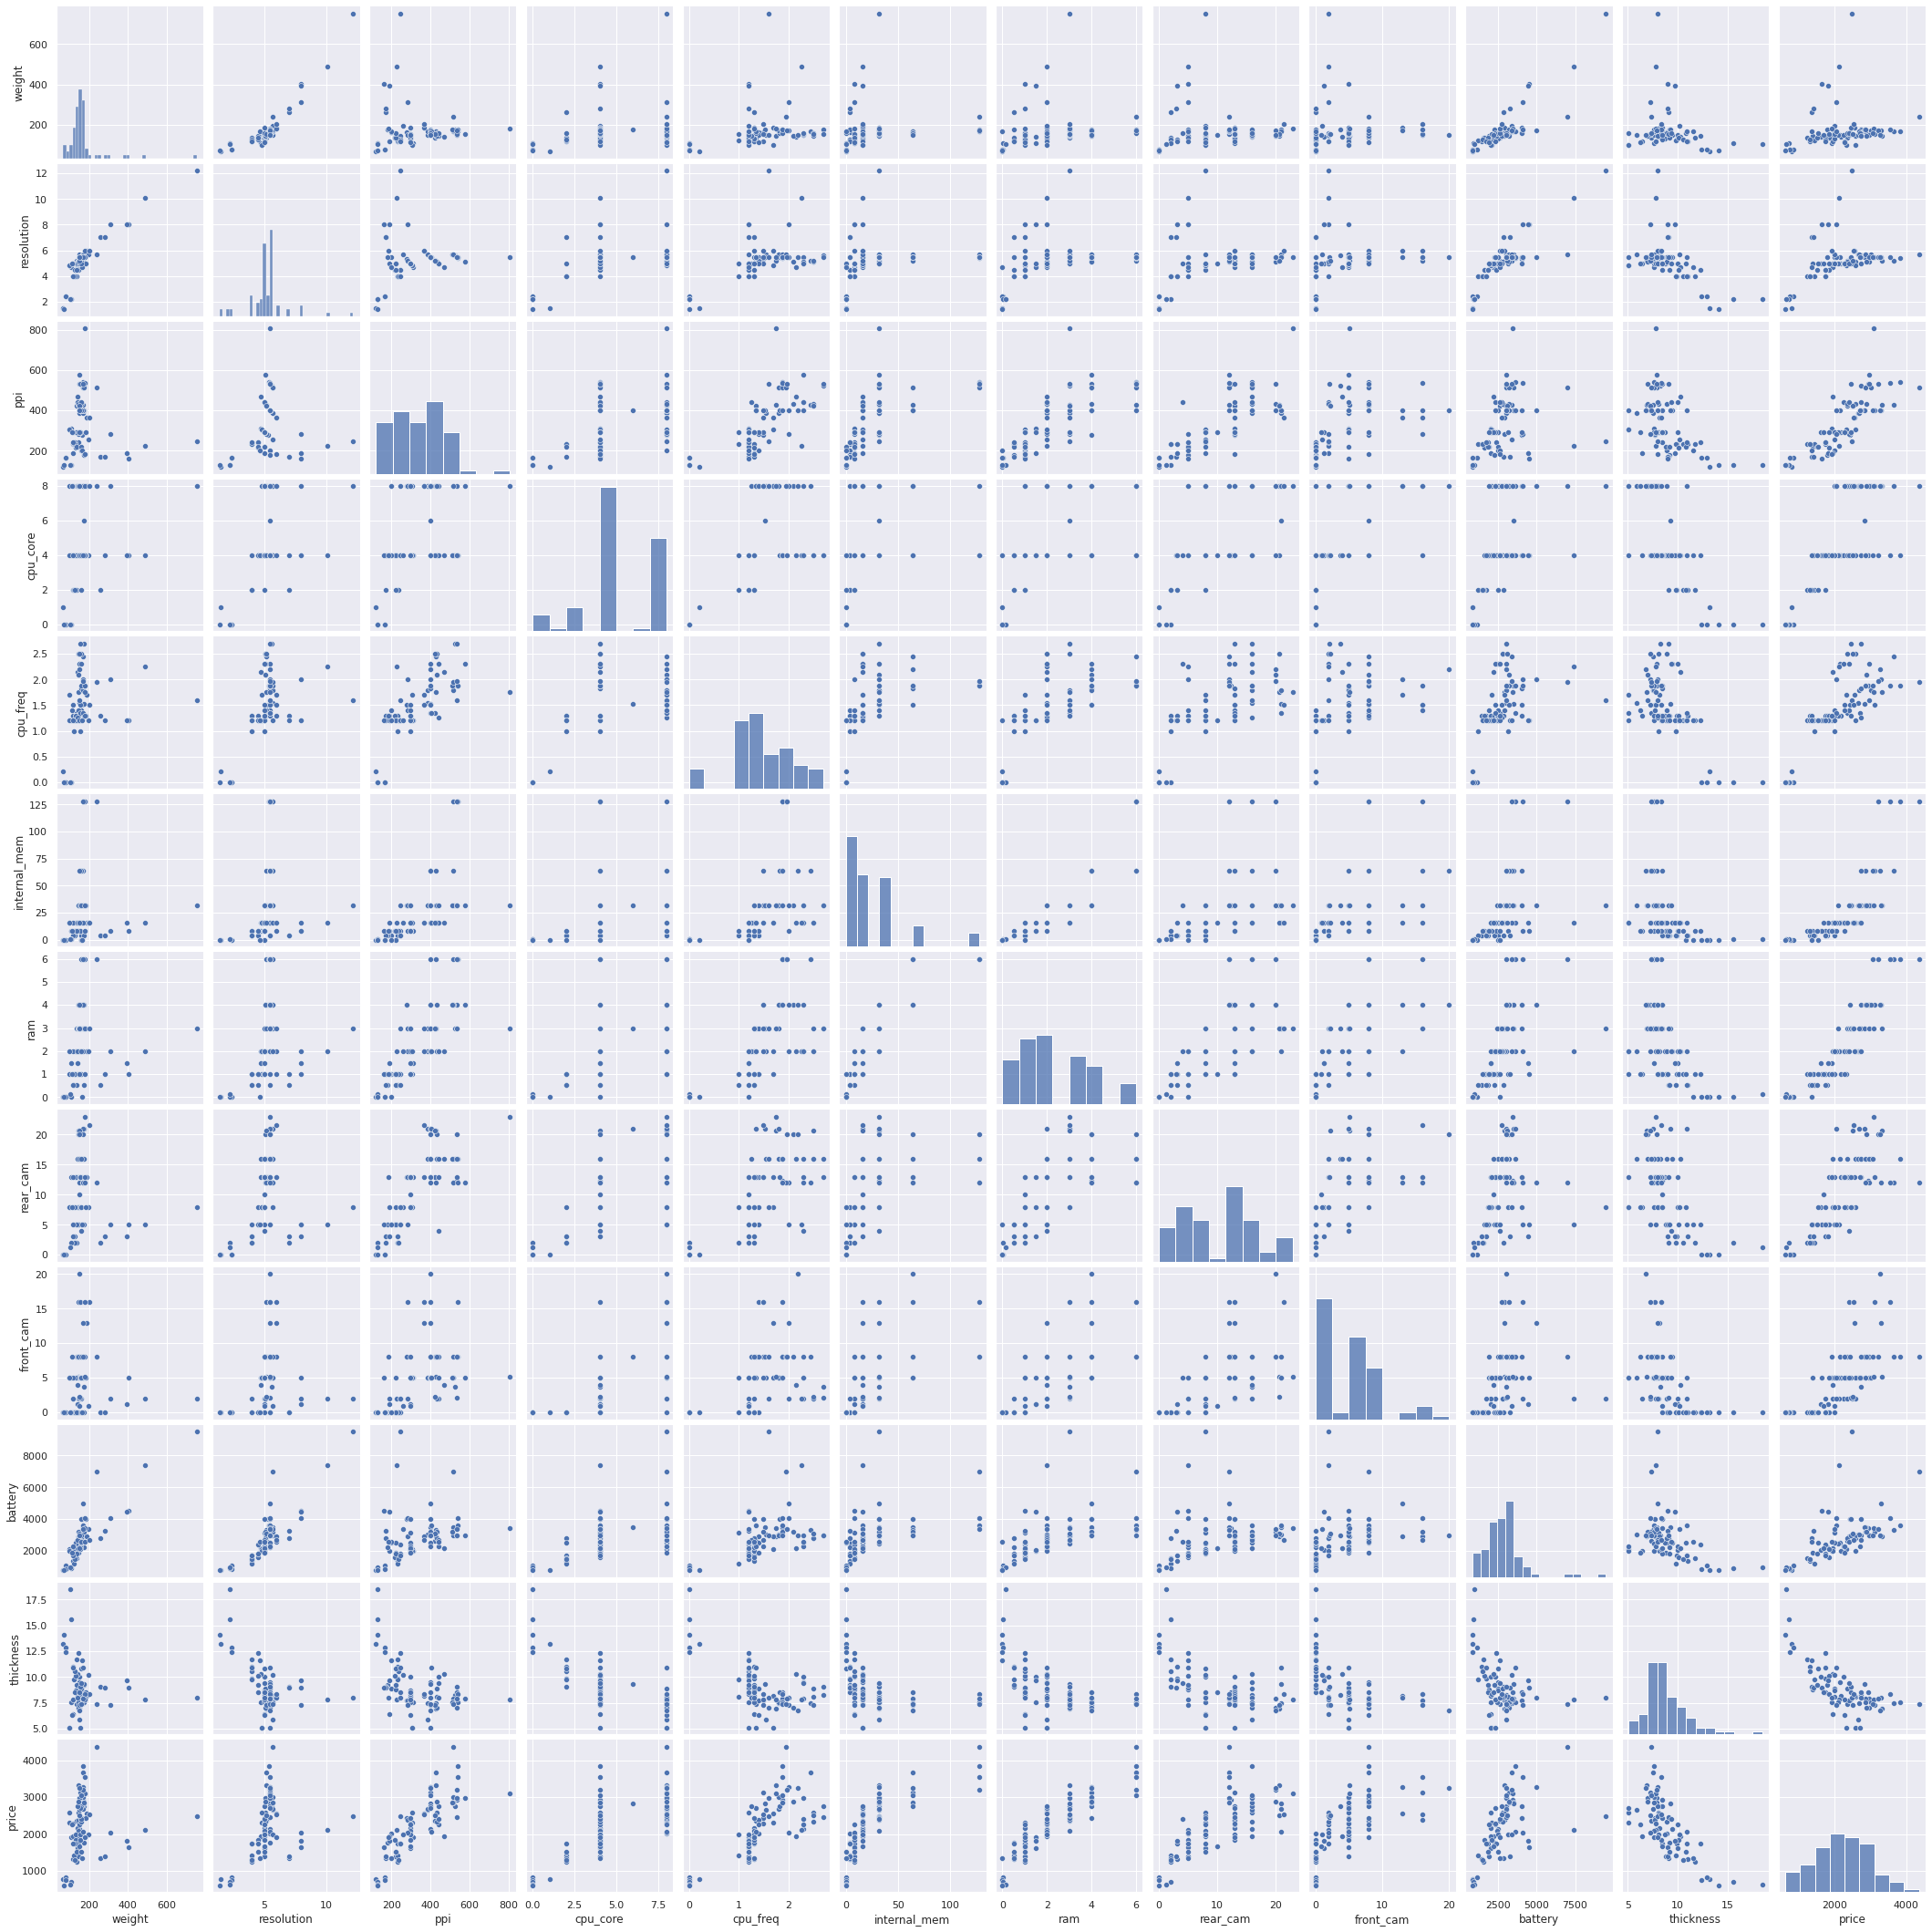

In [58]:
sns.pairplot(data=data_22)

In [28]:
data_22.describe()

,price,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,2219.084337,169.226506,5.206024,334.710843,4.879518,1.501843,24.438410,2.201831,10.469277,4.608434,2826.445783,8.872289
std,763.850279,92.039427,1.492304,134.002505,2.441499,0.595929,28.691272,1.603925,6.164116,4.467940,1355.098217,2.186729
min,614.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1737.500000,134.050000,4.900000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.450000,2020.000000,7.600000
50%,2258.000000,152.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2700.000000,8.400000
75%,2744.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3220.000000,9.750000
max,4361.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [29]:
fig = px.histogram(data_22, x="weight", marginal="violin", hover_data=data_22.columns, nbins=700)
fig.show()

In [30]:
(data[(data['weight'] == 753)])

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
127,1112,2491,455,753.0,12.2,247,8,1.6,32.0,3.0,8.0,2.0,9500,8.0
128,1112,2491,456,753.0,12.2,247,8,1.6,32.0,3.0,8.0,2.0,9500,8.0


In [31]:
fig = px.histogram(data_22, x="battery", marginal="violin", hover_data=data_22.columns, nbins=1000)
fig.show()

In [32]:
#sns.regplot(data=data_22, x="price", y='weight')
#sns.set(style="darkgrid")
#plt.figure(figsize=(13,7))
#sns.regplot(x='price', y="weight", data=data_22, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
#plt.show()

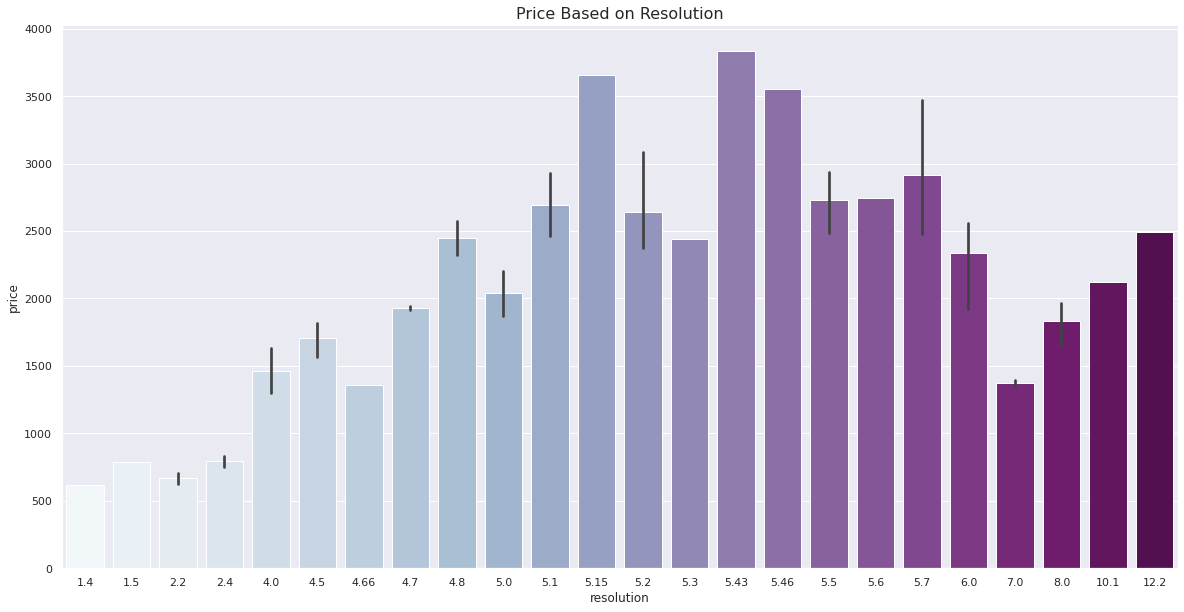

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_22, y='price', x='resolution',palette = "BuPu", ax=ax)
plt.title('Price Based on Resolution',fontsize=16)

fig = px.pie(data_22, names='resolution', height=600, width= 600, color_discrete_sequence=px.colors.sequential.Magenta,  title='Pie Chart for Different Resolution Values')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


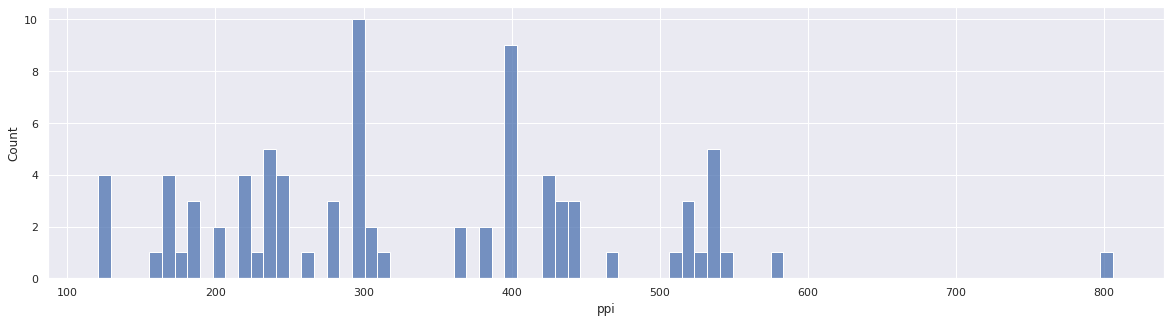

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(data=data_22, x="ppi", bins=80)

In [35]:
fig = px.histogram(data_22, y="cpu_freq", color="cpu_core")
fig.show()

Text(0.5, 1.0, 'Price Based on Internal Memory')

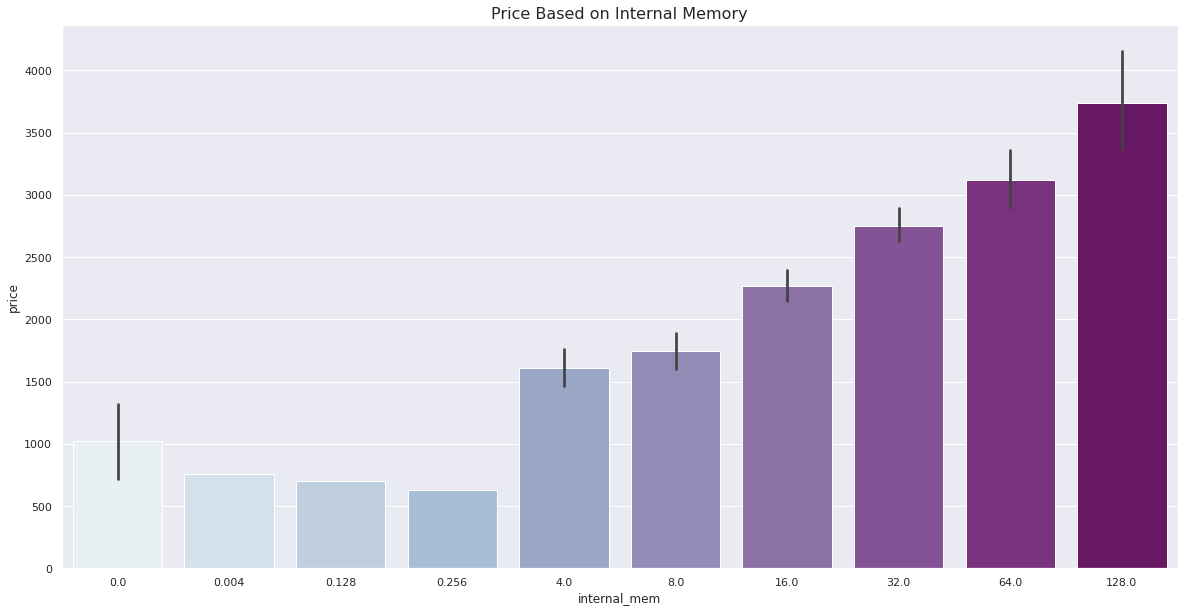

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_22, y='price', x='internal_mem',palette = "BuPu", ax=ax)
plt.title('Price Based on Internal Memory',fontsize=16)



Text(0.5, 1.0, 'Price Based on RAM')

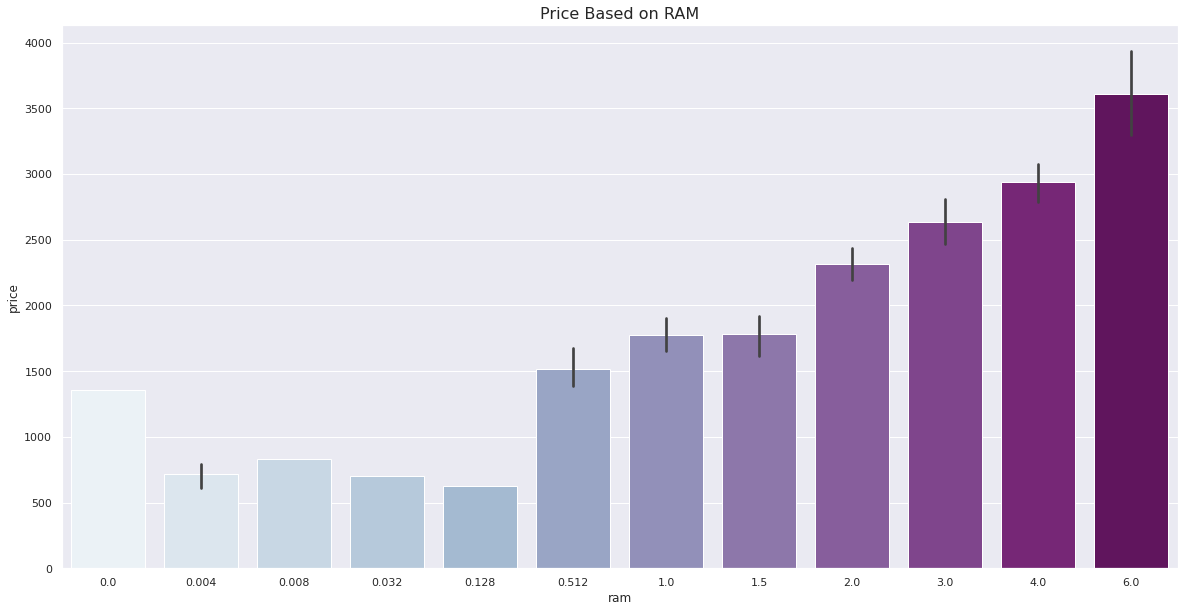

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_22, y='price', x='ram',palette = "BuPu", ax=ax)
plt.title('Price Based on RAM',fontsize=16)

In [38]:
fig = px.density_contour(data_22, x="price", y=["front_cam", "rear_cam"])
fig.show()

In [39]:
data_22.columns

Index(['price', 'weight', 'resolution', 'ppi', 'cpu_core', 'cpu_freq',
       'internal_mem', 'ram', 'rear_cam', 'front_cam', 'battery', 'thickness'],
      dtype='object')

In [83]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [84]:
df1 = data_22.pop('price')
data_22['price']=df1
data_22

,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness,price
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0,1315
5,150.0,5.50,401,4,2.300,16.0,2.000,16.00,8.0,2500,9.5,2137
...,...,...,...,...,...,...,...,...,...,...,...,...
152,238.0,5.70,515,8,1.950,128.0,6.000,12.00,8.0,7000,7.4,4361
154,202.0,6.00,367,8,1.500,16.0,3.000,21.50,16.0,2700,8.4,2536
155,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4,3551
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211


In [85]:
x = data_22.iloc[:,:11]
y = data_22.iloc[:,11]

In [86]:
print(x)

     weight  resolution  ppi  cpu_core  cpu_freq  internal_mem    ram  \
0     135.0        5.20  424         8     1.350          16.0  3.000   
1     125.0        4.00  233         2     1.300           4.0  1.000   
2     110.0        4.70  312         4     1.200           8.0  1.500   
3     118.5        4.00  233         2     1.300           4.0  0.512   
5     150.0        5.50  401         4     2.300          16.0  2.000   
..      ...         ...  ...       ...       ...           ...    ...   
152   238.0        5.70  515         8     1.950         128.0  6.000   
154   202.0        6.00  367         8     1.500          16.0  3.000   
155   178.0        5.46  538         4     1.875         128.0  6.000   
157   170.0        5.50  534         4     1.975         128.0  6.000   
158   150.0        5.50  401         8     2.200          64.0  4.000   

     rear_cam  front_cam  battery  thickness  
0       13.00        8.0     2610        7.4  
1        3.15        0.0     

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
def fit_and_predict(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_test, y_test)

In [89]:
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(float(r2_score(y_test,prediction)*100))
print(float(mean_absolute_error(y_test,prediction)))

89.54124223534308
149.85860536742288


In [90]:
#result = print ("price: %.2f" % prediction([[170,6,540,8,2,64,4,20,8,1864,8]]))

In [91]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
RFC_pred =RFC.predict(x_test)
RFC_pred

array([1396, 2744, 2491, 3055, 2571, 3005, 2466, 2580, 2409, 2409, 1646,
       2054, 2571, 2571, 2087, 3211, 2977])

In [93]:
#print(confusion_matrix(y_test, RFC_pred))

In [94]:
RFC.score(x_train,y_train)

1.0

In [95]:
RFC.score(x_test,y_test)

0.0

In [96]:
resultRFC = classification_report(y_test, RFC_pred)
#print(resultRFC)

In [97]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


In [98]:
data_22

,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness,price
0,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4,2357
1,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9,1749
2,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6,1916
3,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0,1315
5,150.0,5.50,401,4,2.300,16.0,2.000,16.00,8.0,2500,9.5,2137
...,...,...,...,...,...,...,...,...,...,...,...,...
152,238.0,5.70,515,8,1.950,128.0,6.000,12.00,8.0,7000,7.4,4361
154,202.0,6.00,367,8,1.500,16.0,3.000,21.50,16.0,2700,8.4,2536
155,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4,3551
157,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9,3211


In [99]:
data_22.columns

Index(['weight', 'resolution', 'ppi', 'cpu_core', 'cpu_freq', 'internal_mem',
       'ram', 'rear_cam', 'front_cam', 'battery', 'thickness', 'price'],
      dtype='object')

In [100]:
result = print ("Price: %.2f" % RFC.predict([[170,6,540,6,2,64,2,20,8,1864,7]]))

Price: 3211.00


In [103]:
new_data=pd.DataFrame({'weight':170, "resolution":6, "ppi":540, "cpi_core":6, 'cpu_freq':2,
                       "internal_mem":64,"ram":2,"rear_cam":13,'front_cam':8,"battery":1864,"thickness":7},index=[1])
result1 = print ("Price: %.2f" % RFC.predict(new_data))

Price: 2562.00


I wanted here to input code so that it asks for the user to input specs and result in predict mobile price, not sure how to do it, if any one knows please put in comments